# Trabalho Avaliativo de Inteligência Artificial

→ Para elaborar um app que fará a leitura das avaliações dos Reviews em formato e texto, primeiro precisamos analisar os dados da base.

## Importando bibliotecas:
* Pandas        (*análise de dados*)
* Matplotlib    (*análise gráfica*)
* Seaborn       (*análise gráfica*)

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importando a tabela de Reviews e exibindo as primeiras 10 Linhas


In [36]:
df = pd.read_csv('Dados/reviews.csv')

df.head(10)

,review_id,order_id,product_id,user_id,rating,review_text,review_date
0,R00000528,O00000237,P001326,U001094,2,Color was different from images.,2025-10-14T12:03:56.749446
1,R00005792,O00002627,P000329,U001858,4,Highly recommend this brand.,2024-10-09T08:04:50.171793
2,R00036604,O00016798,P001160,U008109,4,Highly recommend this brand.,2024-06-03T05:11:16.787214
3,R00040163,O00018414,P001427,U006835,5,Highly recommend this brand.,2024-02-12T06:41:50.215810
4,R00031127,O00014300,P001639,U007148,3,Item arrived damaged.,2025-01-20T05:32:09.398860
5,R00012121,O00005571,P000545,U008471,2,Item arrived damaged.,2025-03-23T06:43:41.296484
6,R00000603,O00000268,P001726,U005394,4,"Not as expected, quality is poor.",2025-01-01T11:49:13.243196
7,R00010126,O00004654,P001747,U009810,2,"Excellent product, will buy again.",2025-09-07T13:15:38.158573
8,R00033877,O00015558,P000255,U004269,4,Decent product for the price.,2024-09-09T21:51:41.344570
9,R00019035,O00008786,P001146,U003737,4,Item arrived damaged.,2025-03-13T01:50:37.077642


## Analisando a dimensão de linhas e colunas.

In [37]:
df.shape

print(f"A tabela contém: \n Colunas: {df.shape[1]} \n Linhas: {df.shape[0]}")


A tabela contém: 
 Colunas: 7 
 Linhas: 15000


## Analisando dados nulos e tipagem das colunas

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    15000 non-null  object
 1   order_id     15000 non-null  object
 2   product_id   15000 non-null  object
 3   user_id      15000 non-null  object
 4   rating       15000 non-null  int64 
 5   review_text  15000 non-null  object
 6   review_date  15000 non-null  object
dtypes: int64(1), object(6)
memory usage: 820.4+ KB


## Verificando dados duplicados

In [39]:
df_duplicated = df.duplicated().sum()

if df_duplicated == 0:
    print(f"Não foram encontrados dados duplicados.")
else:
    print(f"Foram encontrados {df_duplicated} dados duplicados.")

Não foram encontrados dados duplicados.


## Análise das avaliações dos Reviews:

In [40]:
df.describe()

,rating
count,15000.000000
mean,3.544667
std,1.103669
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


## Distribuição dos dados dos Reviews em Texto.

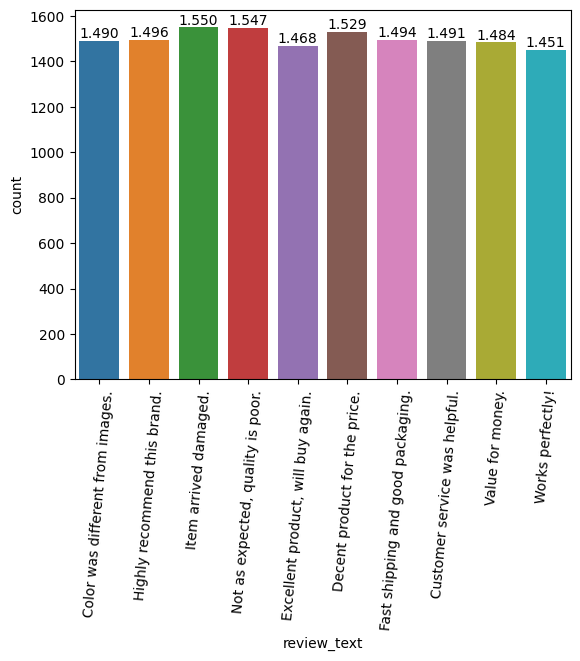

In [41]:

ax = sns.countplot(x=df["review_text"])

# Adicionar os valores em cima das barras
for p in ax.patches:
    value = int(p.get_height())
    if value > 0:
        label = f"{value:,}".replace(",", ".")
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

plt.xticks(rotation=85)  # gira os rótulos do eixo x para melhor visualização
plt.show()



## Distribuição dos dados dos Reviews rating.

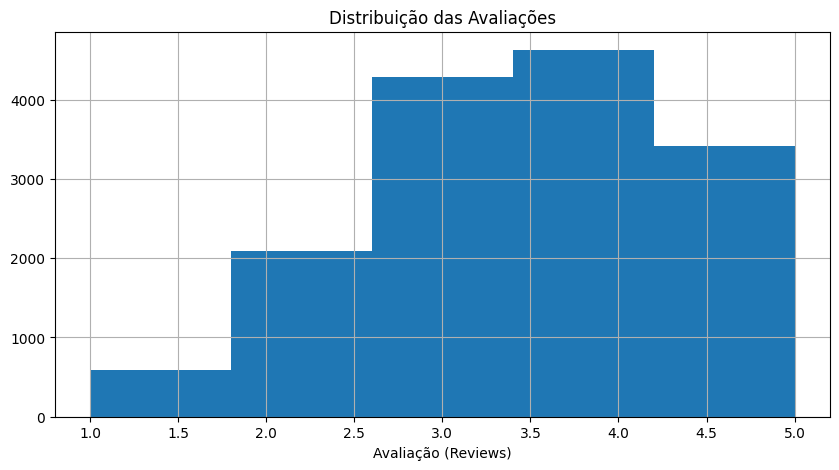

In [42]:
df.hist(column='rating', bins=5, figsize=(10, 5))
plt.title('Distribuição das Avaliações')
plt.xlabel('Avaliação (Reviews)')
plt.show()


C:\Users\marce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


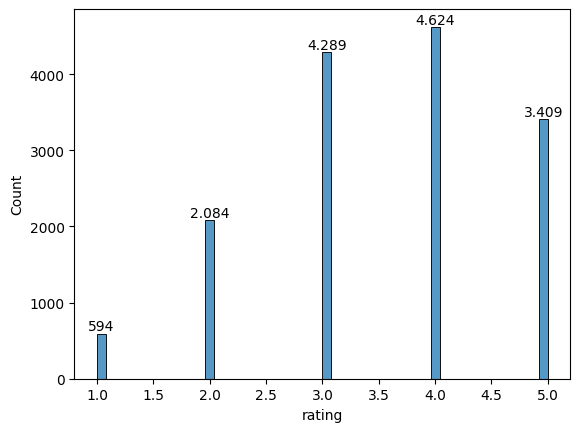

In [43]:
ax = sns.histplot(df["rating"])

for p in ax.patches:
    value = int(p.get_height())
    if value > 0:  # Só mostra se for maior que zero
        label = f"{value:,}".replace(",", ".")  # Ponto de milhar
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

plt.show()

sns.histplot(df, kde=False)

# Conclusão:
  ## Os dados do dataframe encontra-se aptos para as avaliações solicitadas.